In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
x = np.array([[0.5, 1.5], [2.5,1.5], [0.25,1.9],
              [0.75,1.25],[1,1],[1.25,0.9], [1.5, 0.5],
              [3, 0.7], [2, 2], [1.5,2.25], [1, 2.5]])

y = np.array([0, 1, 0,
              0, 0, 0,
              0, 1, 1,
              1,1])

b_init = -3
w_init = np.array([ 1, 1])


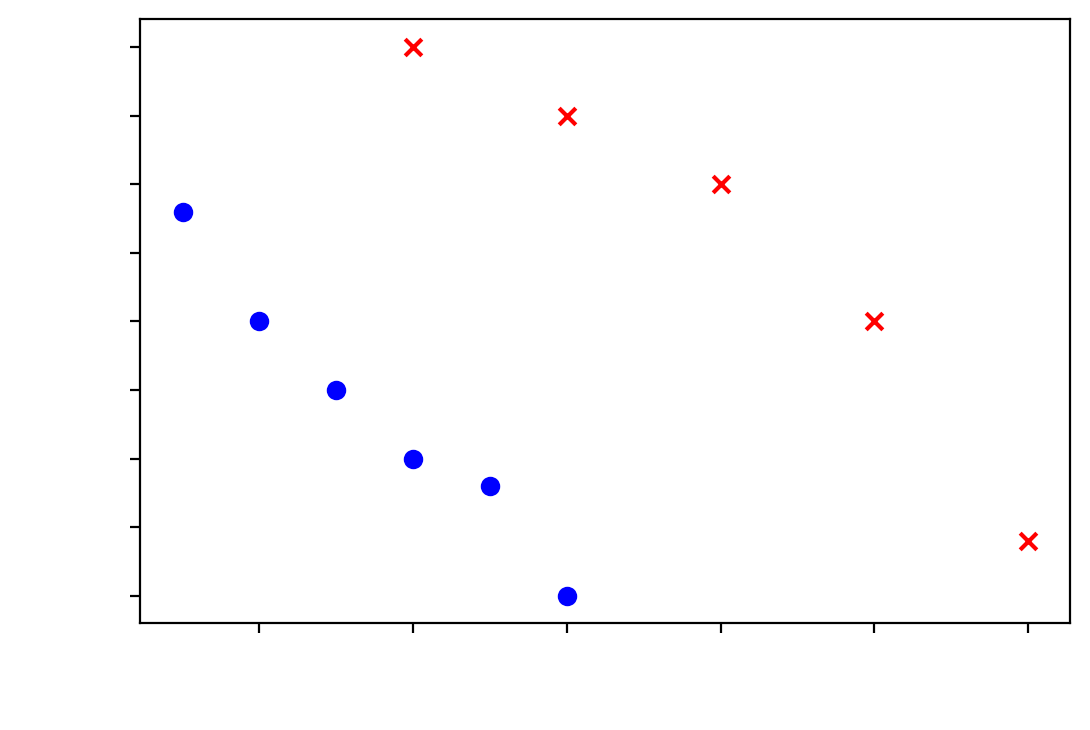

In [3]:
x1_train = x[:,0]
x2_train = x[:,1]
pos = (y == 1)
neg = (y == 0)

plt.figure(dpi = 200)
plt.scatter(x1_train[pos],x2_train[pos], label =  "Y = 1 " ,marker = "x", c ="r" )
plt.scatter(x1_train[neg],x2_train[neg], label = "Y = 0" ,marker = "o", c = "b")

plt.xlabel("X0", c = "w" )
plt.ylabel("X1", c = "w" )
plt.xticks(c = "w" )
plt.yticks( c = "w" )

plt.show()

In [4]:
def logistic_model (z):
    z = np.array(z)
    g_z = 1/(1+(np.exp(-z)))
    return g_z

In [5]:
def liner_modle (x,w,b):
    m = x.shape[0]
    f_wb = []
    for i in range(m):
        f_wb.append(np.dot(w,x[i]) + b) 
    return f_wb

In [6]:
def Cost_logistic(x,y,w,b):
    f_wb = logistic_model(liner_modle(x,w,b))
    loss = []
    m = x.shape[0]
    for i in range(m):
        loss.append( y[i]*np.log(f_wb[i]) + (1-y[i])*np.log(1-f_wb[i]))
    return sum(loss) / -m                   

# Gradent
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})  
\end{align*}$$
$z = \mathbf{w} \cdot \mathbf{x} + b$  
$f_{\mathbf{w},b}(x) = g(z)$  
where $g(z)$ is the sigmoid function:  
$g(z) = \frac{1}{1+e^{-z}}$   

In [7]:
def gradent (x,y,w,b):
    m,n =x.shape
    f_wb = logistic_model(liner_modle(x,w,b))
    dj_dw = []
    dj_db = []
    for j in range(n):
        cost = []
        for i in range(m):
            cost.append((f_wb[i]-y[i])*x[i][j])
        dj_dw.append(sum(cost)/m)
    
    for i in range(m):
        dj_db.append((f_wb[i]-y[i]))
    
    return dj_dw,sum(dj_db)/m 
            

# Gradient descent algorithm :
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j}   \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

In [8]:
def gradent_descent(x,y,w,b,alpha,num_iter):
    iter_num_i = []
    cost_for_iter_num_i = []
    for i in range(num_iter):
        dj_dw ,dj_db = gradent(x,y,w,b)
        w = w - alpha * np.array(dj_dw)
        b = b - alpha * dj_db
        if i%100 == 0:
            iter_num_i.append(i)
            cost_for_iter_num_i.append(Cost_logistic(x,y,w,b))
        if i%1000 == 0:
            print ("iter {}: w = {} & b = {} ========>  Cost:  {}".format(i,w,b,Cost_logistic(x,y,w,b)))
    print("the optimal value for w = {} & b = {}".format(w,b))
    return w,b,iter_num_i,cost_for_iter_num_i

In [9]:
# testing cost function with intial values w_int & b_int 
Cost_logistic(x,y,w_init,b_init)

0.3504940273794721

In [10]:
# testing gradent function with intial values w_int & b_int
dj_dw ,dj_db = gradent(x,y,w_init, b_init)
print(dj_dw)
print(dj_db)


[-0.14606964393354668, -0.0779863719302401]
0.009688578212496206


In [11]:
w,b,iter_num_i,cost_for_iter_num_i = gradent_descent(x,y,w_init,b_init,0.2,10000)

iter 0: w = [1.02921393 1.01559727] & b = -3.0019377156424993 ========>  Cost:  0.3454347209284535
iter 1000: w = [3.28038813 2.99311822] & b = -8.904891530868726 ========>  Cost:  0.07075632453802774
iter 2000: w = [4.01801544 3.80697487] & b = -11.139825650161802 ========>  Cost:  0.03882603991779459
iter 3000: w = [4.47985409 4.30995945] & b = -12.525723330351775 ========>  Cost:  0.026753560348649327
iter 4000: w = [4.8165809  4.67443272] & b = -13.531503244215276 ========>  Cost:  0.020426477693697268
iter 5000: w = [5.08175508 4.96037797] & b = -14.321293180072669 ========>  Cost:  0.01653288108106073
iter 6000: w = [5.30057244 5.19572033] & b = -14.971712794051973 ========>  Cost:  0.013894770573378245
iter 7000: w = [5.48689896 5.39572819] & b = -15.52472509236094 ========>  Cost:  0.011988660882303692
iter 8000: w = [5.64918174 5.56966082] & b = -16.005807115631015 ========>  Cost:  0.010546593056797242
iter 9000: w = [5.79294865 5.72355696] & b = -16.431588628616865 ========>

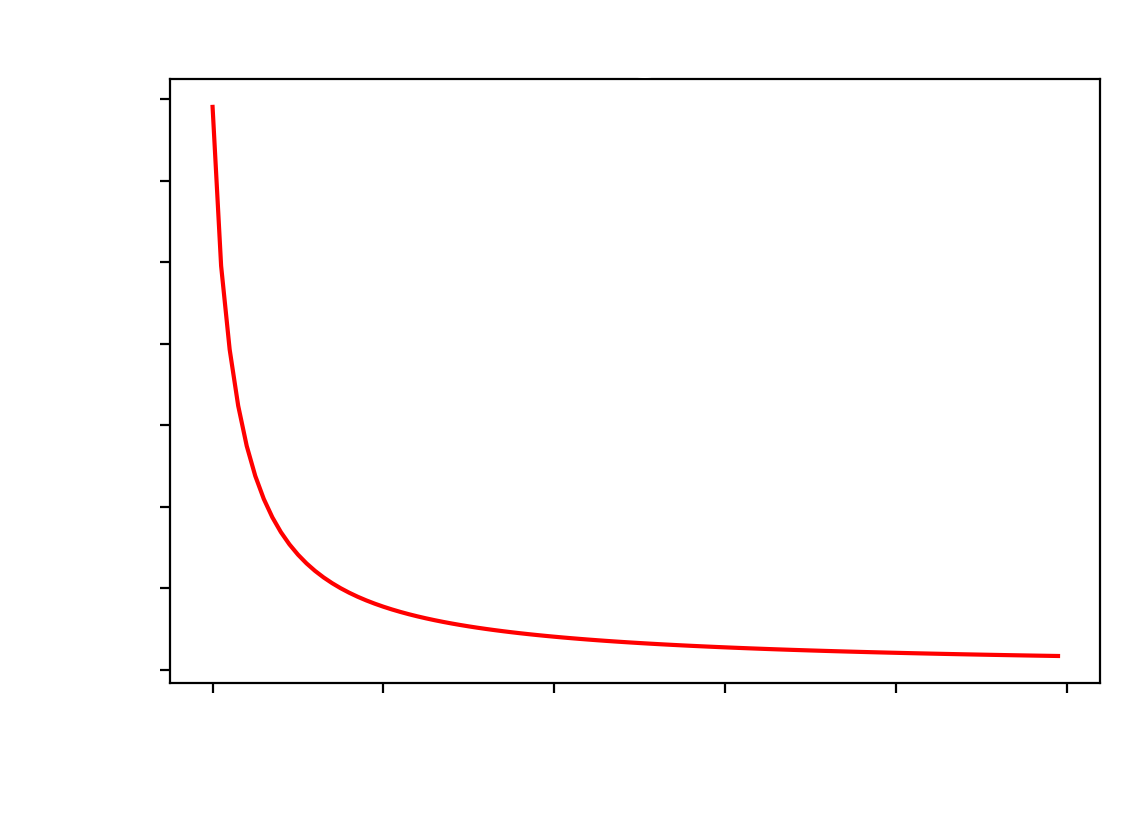

In [17]:
plt.figure(dpi = 200)
plt.plot(iter_num_i,cost_for_iter_num_i,c = 'r')

plt.title("Learning Curve",fontdict={"fontname":'comic sans ms',"fontsize":20},color= "w")
plt.xlabel('num_iterations',fontdict={"fontname":'comic sans ms',"fontsize":20},color= "w")
plt.ylabel('Cost',fontdict={"fontname":'comic sans ms',"fontsize":20},c = 'w')
plt.xticks(c = "w")
plt.yticks(c = "w")
plt.show()

In [13]:
predction =  100*logistic_model(liner_modle(x,w,b))
predction

array([ 0.63052216, 99.88692389,  1.48331262,  0.64006184,  0.6497449 ,
        1.57428931,  0.66954974, 99.36663526, 99.88345804, 99.48208533,
       97.72979588])

In [14]:
for i in predction:
    if i > 50:
        print("{} % maligmant ===> maligmant".format(i))
    else:
        print("{} % maligmant ===> not_maligmant".format(i))

0.6305221598211582 % maligmant ===> not_maligmant
99.88692389330876 % maligmant ===> maligmant
1.4833126201410576 % maligmant ===> not_maligmant
0.6400618369062753 % maligmant ===> not_maligmant
0.6497449036920134 % maligmant ===> not_maligmant
1.5742893141469188 % maligmant ===> not_maligmant
0.6695497430504875 % maligmant ===> not_maligmant
99.36663526097679 % maligmant ===> maligmant
99.88345803778694 % maligmant ===> maligmant
99.4820853252541 % maligmant ===> maligmant
97.72979587818685 % maligmant ===> maligmant


In [15]:
x0 = np.arange(0,4)
x1 =  -(b + w[0]*x0)/w[1]

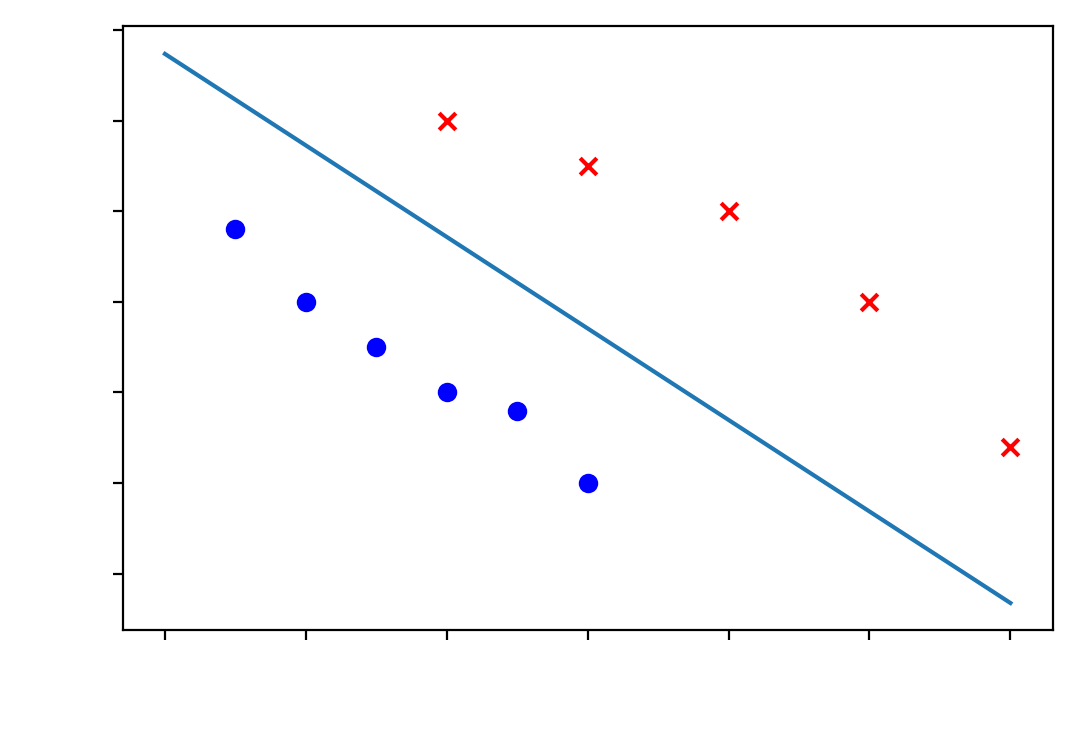

In [16]:
x1_train = x[:,0]
x2_train = x[:,1]
pos = (y == 1)
neg = (y == 0)

plt.figure(dpi = 200)
plt.scatter(x1_train[pos],x2_train[pos], label =  "Y = 1 " ,marker = "x", c ="r" )
plt.scatter(x1_train[neg],x2_train[neg], label = "Y = 0" ,marker = "o", c = "b")
plt.plot(x0,x1)
plt.xlabel("X0", c = "w" )
plt.ylabel("X1", c = "w" )
plt.xticks(c = "w" )
plt.yticks( c = "w" )

plt.show()